### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Initial clean up or dataset

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'], axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# APPLICATION_TYPE value counts for binning
application_counts = application_df['APPLICATION_TYPE'].value_counts()

# Determine which values to replace if counts are less than 400  (from previous deliverable)
replace_application = list(application_counts[application_counts<400].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Determine which values to replace if counts are less than 1000 (from previous deliverable)
replace_class = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

## Look at rest of variables in dataset

In [7]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [8]:
application_df.isnull().sum()

APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [9]:
for col in application_df.dtypes[application_df.dtypes=='object'].index.tolist():
    print(col)
    print('-----------------')
    print(application_df[col].value_counts())

APPLICATION_TYPE
-----------------
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
AFFILIATION
-----------------
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64
CLASSIFICATION
-----------------
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64
USE_CASE
-----------------
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
ORGANIZATION
-----------------
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
INCOME_AMT
-----------------
0                24388
25000-99999       3747
100000-499999     3

In [10]:
# Remove features that are heavily unbalanced.
#application_df=application_df.drop(columns=['SPECIAL_CONSIDERATIONS','INCOME_AMT'])
application_df=application_df.drop(columns=['SPECIAL_CONSIDERATIONS','INCOME_AMT'])

In [11]:
# helper functions
import math
import os
import matplotlib.pyplot as plt

# Generate boxplots for all numeric variables (!= 'object') in the DataFrame.
# plots are generated 5 variables per row.
def boxplots(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].boxplot(df[col])
            axs[j].set_title(col)
        else:
            axs[i][j].boxplot(df[col])
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()

# Generate histograms with 20 bins for all numeric variables (!= 'object') in the DataFrame.
# plots are generated 5 variables per row.
def histograms(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].hist(df[col], alpha=0.5, bins=20)
            axs[j].set_title(col)
        else:
            axs[i][j].hist(df[col], alpha=0.5, bins=20)
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()

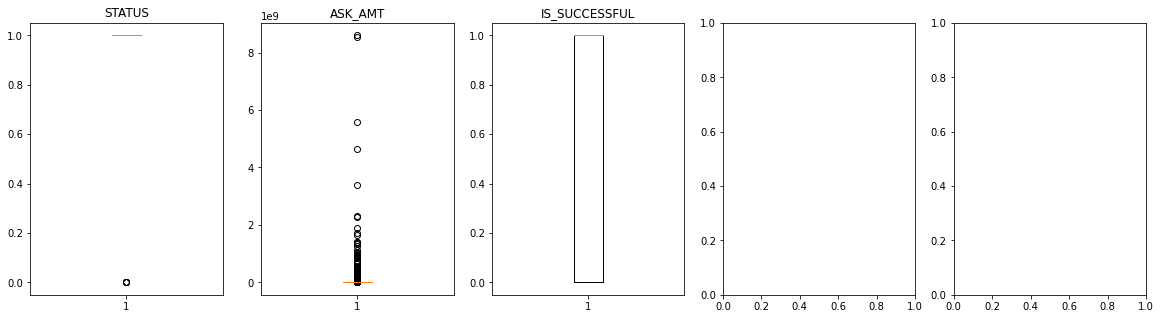

In [12]:
# Check numeric variables.
boxplots(application_df)

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes=='object'].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
application_df.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(['IS_SUCCESSFUL'],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
print(X_train_scaled.shape)
X_train_scaled

(25724, 32)


array([[ 0.01394306, -0.02953464, -0.08603258, ..., -0.11846277,
        -0.03529198, -1.47121476],
       [ 0.01394306, -0.02953464, -0.08603258, ..., -0.11846277,
        -0.03529198,  0.67971042],
       [ 0.01394306, -0.02953464, -0.08603258, ..., -0.11846277,
        -0.03529198,  0.67971042],
       ...,
       [ 0.01394306, -0.02953464, -0.08603258, ..., -0.11846277,
        -0.03529198, -1.47121476],
       [ 0.01394306, -0.01481201, -0.08603258, ..., -0.11846277,
        -0.03529198,  0.67971042],
       [ 0.01394306, -0.02953464, -0.08603258, ..., -0.11846277,
        -0.03529198,  0.67971042]])

## Use Keras Auto Tuner

In [32]:
n_features=len(X.columns)
n_features

32

In [33]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=50,
        max_value=100,
        step=10), activation=activation, input_dim=n_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=50,
            max_value=100,
            step=10),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [34]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.RandomSearch(
    create_model,
    objective = 'val_accuracy',
    max_trials = 10,
    directory=os.path.normpath('C:/'))

In [35]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 10 Complete [00h 00m 26s]
val_accuracy: 0.7294460535049438

Best val_accuracy So Far: 0.7294460535049438
Total elapsed time: 00h 03m 52s
INFO:tensorflow:Oracle triggered exit


In [36]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 70,
 'num_layers': 5,
 'units_0': 80,
 'units_1': 70,
 'units_2': 90,
 'units_3': 50,
 'units_4': 90,
 'units_5': 60}

In [37]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5559 - accuracy: 0.7294
Loss: 0.5559219717979431, Accuracy: 0.7294460535049438


### Alternative manual modeling construction

In [48]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_features = len(X_train_scaled[0])
n_nodes_layer1 = n_features*3
n_nodes_layer2 = n_features*3
n_nodes_layer3 =  n_features*3
n_nodes_layer4 = n_features*3
n_nodes_layer5 =  n_features*3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=n_nodes_layer1, input_dim=n_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=n_nodes_layer2, activation='relu'))
nn.add(tf.keras.layers.Dense(units=n_nodes_layer3, activation='relu'))
nn.add(tf.keras.layers.Dense(units=n_nodes_layer4, activation='relu'))
nn.add(tf.keras.layers.Dense(units=n_nodes_layer5, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='relu'))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 96)                3168      
_________________________________________________________________
dense_23 (Dense)             (None, 96)                9312      
_________________________________________________________________
dense_24 (Dense)             (None, 96)                9312      
_________________________________________________________________
dense_25 (Dense)             (None, 96)                9312      
_________________________________________________________________
dense_26 (Dense)             (None, 96)                9312      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 97        
Total params: 40,513
Trainable params: 40,513
Non-trainable params: 0
__________________________________________________

In [49]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# Import checkpoint dependencies
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Define path and callback
os.makedirs("checkpoints_del3/", exist_ok=True)
checkpoint_path = "checkpoints_del3/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1,
                             save_weights_only=True,
                             save_freq='epoch', period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=60)

Epoch 1/60
804/804 [==============================] - 1s 954us/step - loss: 0.6925 - accuracy: 0.6935
Epoch 2/60
804/804 [==============================] - 1s 949us/step - loss: 0.6562 - accuracy: 0.7107
Epoch 3/60
804/804 [==============================] - 1s 964us/step - loss: 0.6218 - accuracy: 0.7188
Epoch 4/60
804/804 [==============================] - 1s 959us/step - loss: 0.5780 - accuracy: 0.7235
Epoch 5/60
804/804 [==============================] - 1s 972us/step - loss: 0.5910 - accuracy: 0.7244
Epoch 6/60
804/804 [==============================] - 1s 966us/step - loss: 0.5954 - accuracy: 0.7248
Epoch 7/60
804/804 [==============================] - 1s 949us/step - loss: 0.5868 - accuracy: 0.7188
Epoch 8/60
804/804 [==============================] - 1s 985us/step - loss: 0.6012 - accuracy: 0.7152
Epoch 9/60
804/804 [==============================] - 1s 967us/step - loss: 0.6045 - accuracy: 0.7110
Epoch 10/60
804/804 [==============================] - 1s 977us/step - loss: 0.593

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5540 - accuracy: 0.7375
Loss: 0.5539984107017517, Accuracy: 0.7374927401542664


In [30]:
# Save model to hdf5 file
nn.save("AlphabetSoupCharity.h5")